In [2]:
#Import all the required Libraries

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression 

In [4]:
# Step 1 load the data files
data = pd.read_csv('1.04.+Real-life+example.csv')

In [5]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
data.describe()
# Describe generally shows only the numerical features for categorical we need to have include ="all"

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Preprocessing Step 

In [8]:
# Cleaning the data from outliers, missing values, irrelevant and not needed features

In [9]:
# Working on missig values first - Feature Price and EngineV has missing values let's do something with them

In [10]:
data.isnull().sum()
# Which explains that out of 4345 counts only 172 and 150 counts of feature price and engineV are missing
# Which are less than 5% of total hence we can easliy drop them.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [11]:
data_1 = data.dropna(axis=0) # Note that axis =0 represents here rows

In [12]:
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [13]:
# Now looking at the categorical features we have model with unique couns 306 which is really huge
# We can drop this feature as it will not effect the Model as we have a lot of features in the consideration 

In [14]:
data_2 = data_1.drop('Model',axis=1)
data_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [15]:
# We need to be sure that our indepenent features have linear relation with the dependent feature that is "Price"
# We can do so by checking the PDC of the features PDC are probabilty distribution curves and they are probabilty in y axis

#### Checking PDC

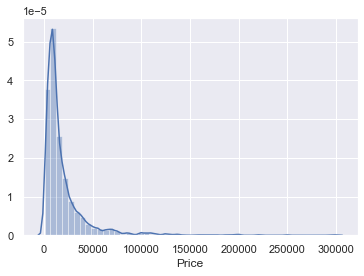

In [16]:
#How to write code for PDC?
sns.distplot(data_2['Price'])
# Clearly from the describe we can see the maximum is really huge compared to the mean which highlights the Outliers,
# we need to remove them using the quartile method - we need to remove the max 1% first and check the outcome

In [17]:
#Using the method quantile 

In [18]:
q = data_2['Price'].quantile(0.99)
# Now remove the values higher than q because this is the maximum value appearing at 99% quantile
data_3 = data_2[data_2['Price']<q] 
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [19]:
#Lets check the PDC if it changes after this alteration?

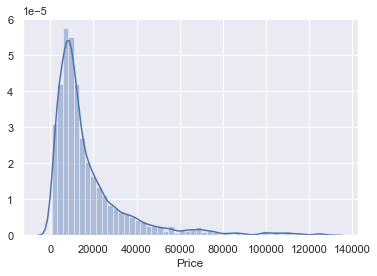

In [20]:
sns.distplot(data_3['Price'])

In [21]:
# Not much of change here hene we can leave it for a while - the outliers are lot more than what we expected 

In [22]:
# Lets move on to other features to check the PDC 

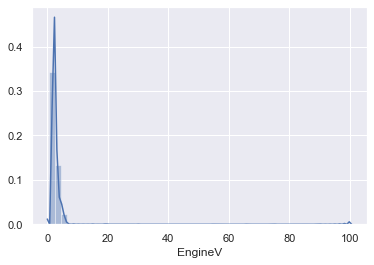

In [23]:
# Checking with EngineV
sns.distplot(data_3['EngineV'])
# Seriously sick one - we can again have the same operation done to reslove this skweness due to outliers

In [24]:
r = data_3['EngineV'].quantile(0.99)
r

6.0

In [25]:
# Does it makes sense ?

In [26]:
# we see the 99% quantile results in 6 which means there are really some less count of ouliers with value greater than 6

In [27]:
# we can mannually see the data to check how many are they - is there any issue like human error or machine error 

In [28]:
# We can remove those by using benchmarks - here EngineV should be 6 or less than that 

In [29]:
data_4 = data_3[data_3['EngineV'] < 6.5]

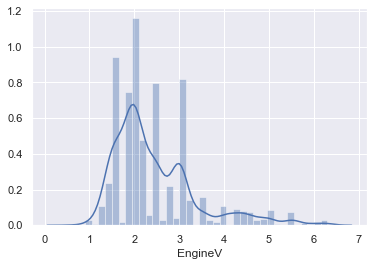

In [30]:
# now check the PDC again
sns.distplot(data_4['EngineV'])
# Quite a good output now, we can check with other feature remaining that is mileage

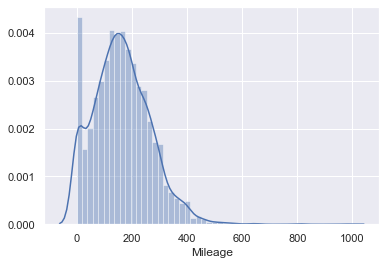

In [31]:
sns.distplot(data_4['Mileage'])

In [32]:
# Another left shifted PDC , which means again remove some outliers
t =  data_4['Mileage'].quantile(0.99)
data_5 = data_4[data_4['Mileage'] < t]

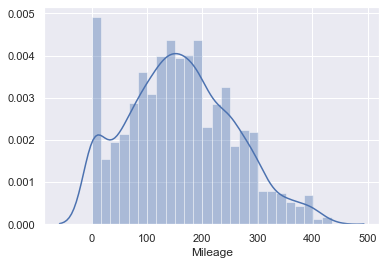

In [33]:
sns.distplot(data_5['Mileage'])
# Great we removed another outliers, now what ? another feature which is numerical is Year what to do ?

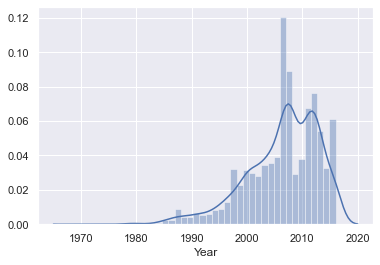

In [34]:
sns.distplot(data_5['Year'])
# This one is actually a little different it is right shifted instead of left hence we need to do it now other way

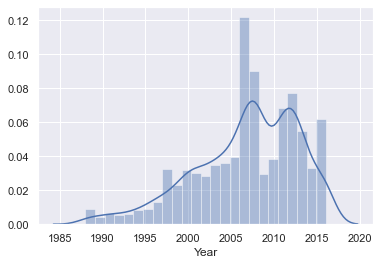

In [35]:
ee = data_5['Year'].quantile(0.01)
data_6= data_5[data_5['Year']>ee]
sns.distplot(data_6['Year'])
# Wonderful a another outlier feature resloved

In [36]:
# Till now what all we did? We removed Model, and outliers and also missing values
# Now we need to clear index our data, because that's something pandas lib requries for regression

In [37]:
data_cleaned = data_6.reset_index(drop=True)

In [38]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


#### OLS Assumptions 

In [39]:
# Now what? Next step is to check are we ready for regression that is do we have linaer relation with 
# dependent and independet features now how to do that - that is to check scatter plots do they are  linaer with "Price"

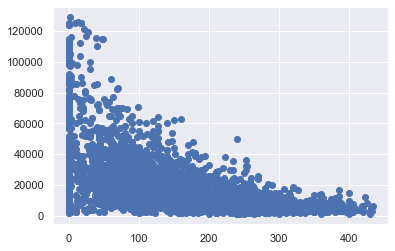

In [40]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['Price'])

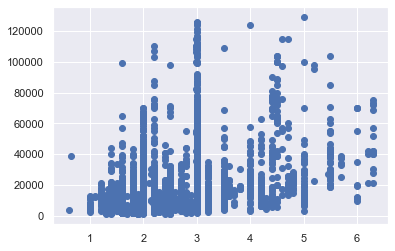

In [41]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['Price'])

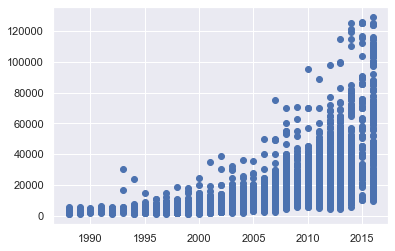

In [42]:
plt.scatter(data_cleaned['Year'],data_cleaned['Price'])

In [43]:
# These all three charts explains we need to do soemthing with Price feature to makes sure OLS assuptions
# for linaer regssion are taken care

###  the way to do that is log transformation here we go!


In [44]:
# We will use the numpy log transformation mehtod and then use updated feature for to recheck the change

In [45]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


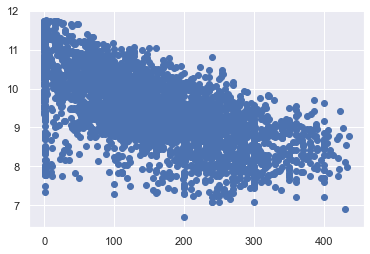

In [46]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])

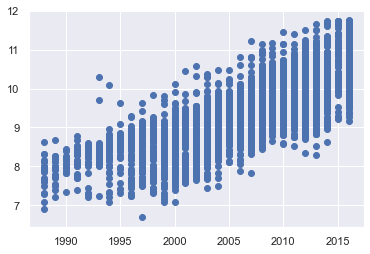

In [47]:
plt.scatter(data_cleaned['Year'],data_cleaned['log_price'])

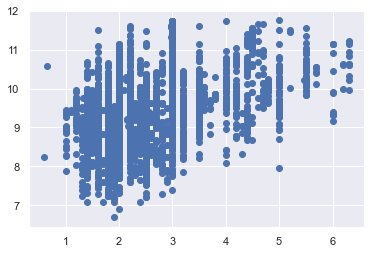

In [48]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])

In [49]:
#Great we made dependent feature to have linaer relation with the indepenedts ones

In [50]:
# The next step is to check for other OLS assummptions that are 2) No Endogensity (No corelation between Error and X,
# occures due to ommitted variable biasness, this one is not viloted hence we can go ahead) 
# 3) Normality, Zero mean and Homosecadasticity 
#  Normality is assumed , and zero mean is made by usign intercept in the equation, 
# Homosecadasticity is done using log transformation which we have already taken in account
# 4) no autocorelation : for this the data needs to be from time series data or panel data hence we don't have it
# 5) No Multicollinearity: bascially the features are interrelated -> This needs to be checked

#### Multicollinearity Chekcing 

In [51]:
# the year and mileage are related -> Sklaern don't have a method for checking Multicol.. hence we need to have one of ours code

In [52]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [53]:
# We will use stats model -> that has VIF variance inflation factor method which helps get multicollinerity 
# VIF can be checked for continues variables (numericals whicha are mileage, year and engineV in our case)
#In statistics, the variance inflation factor (VIF) is the quotient of the variance in a model with multiple
# terms by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an 
# ordinary least squares regression analysis. when VIF is < 10 it is acceptable ideal is 1 else feature should be rejected

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [54]:
# Clearly we need to drop the Year feature here as it has mc > 10
data_no_multic = data_cleaned.drop(['Year'],axis=1)

# This was the last step for OLS assuptions next is dummy data- features whicha are categorical in nature

### Dealing with Categorical Variables and craeting Dummy ones

In [55]:
# Pandas has get dummies method - which does this in one go 
#v Note that we will have n-1 dummies for n cateories reasoasn if n is then MC starts to exist 
# bascially Mc is introduced by having n dumies so only n-1

In [56]:
data_with_dummies = pd.get_dummies(data_no_multic,drop_first=True)

In [57]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


####   Rearrage the data set with price feature at the start

In [58]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [59]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [60]:
data_preprocessed =  data_with_dummies[cols]
# Note that i removed price here

In [61]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


###  Linear regression model 

In [62]:
# Step to create linear regression equation 

target = data_preprocessed ['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1) # Quti smart here

In [63]:
# Scaling is needed why ? forgot ? Standisation of the features requirede to make them normal

In [64]:
# Scale the data

In [65]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(inputs)
# Scaling of the dummy variables is not recommended it is not correct for ML we are doing it here any ways

inputs_scaled = scaler.transform(inputs)

### Train and Testing partition

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(inputs_scaled,target,test_size = 0.2,random_state=365)

### Creating the regression model here

In [67]:
reg  =LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [68]:
# the next thign which we should do is to check the regression model
# for that we can plot the yhat that is the predicted value against the obersereved value

In [69]:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Y_Hat')

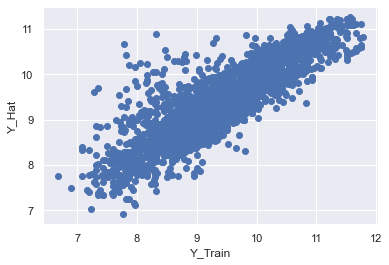

In [70]:
plt.scatter(y_train,y_hat)
plt.xlabel('Y_Train')
plt.ylabel('Y_Hat')
# Ideally this should be 45 degree line for better model - but it misses many places 

In [71]:
# another popular check is residual check i.e. y_train-y_hat

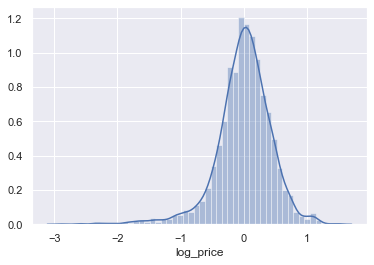

In [74]:
sns.distplot(y_train-y_hat)
#looking at this we can understand the left side is wider means overeeastimation is done for some
# whereas looking at the right side we can conlcude the model is not undereastimating 
# This can food for thought how to imporve the model

In [76]:
reg.score(x_train,y_train)
# This is R2 score - how better the model eastimate this is good 75% but more imporveent can be done

0.744996578792662

#### Finding the weights(coefficients) and bias 

In [77]:
reg.intercept_

9.415239458021299

In [78]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [80]:
reg_summary  = pd.DataFrame(inputs.columns, columns = ['Features'])

In [81]:
reg_summary['Weights'] = reg.coef_

In [83]:
reg_summary
# + and - has meaning basically when + is there means the feature increases the price as it increases else opposite

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [84]:
# The dummies which are not displayed acts as benchmanrk here like audi 

### Testing part here -  with test data set 

In [85]:
y_hat_test = reg.predict(x_test)

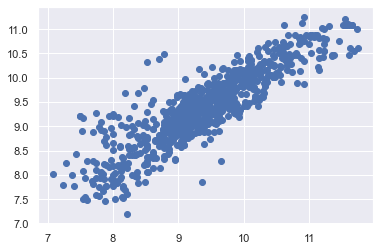

In [86]:
plt.scatter(y_test,y_hat_test)

In [89]:
# getting to the predicted prices 
dataset_perfromace = pd.DataFrame(y_hat_test,columns = ['Predictions'])
dataset_perfromace.head()

,Predictions
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


In [109]:
# these are in log and we need to take exponential in here
# we can use Numpy method np.exp
dataset_perfromace = pd.DataFrame(np.exp(y_hat_test),columns = ['Predictions'])
dataset_perfromace.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [110]:
dataset_perfromace['Target'] = np.exp(y_test)

In [111]:
dataset_perfromace.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [112]:
# the reasosn for getting NAN is index mismatch
# because the y-test has indexes in it we need to remove them

In [113]:
y_test

0       7.740664
1       7.937375
2       7.824046
3       8.764053
4       9.121509
         ...    
769    10.292146
770     9.169518
771     9.814656
772    11.134589
773     9.287301
Name: log_price, Length: 774, dtype: float64

In [114]:
y_test = y_test.reset_index(drop = True)

In [115]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [116]:
dataset_perfromace['Target'] = np.exp(y_test)

In [117]:
dataset_perfromace

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [118]:
# Adding residual to compare  SSE minimisarion as OLS works on this 

In [119]:
dataset_perfromace['Resiudal'] = dataset_perfromace['Target'] - dataset_perfromace['Predictions']

In [120]:
# to make it extra easy we can add % as well here 
# also we will make this difference to be absolute off by 1% or more by 1% both are differences

In [123]:
dataset_perfromace['Difference'] = np.absolute(dataset_perfromace['Resiudal'] / dataset_perfromace['Target']*100)

In [124]:
dataset_perfromace

,Predictions,Target,Resiudal,Difference
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [126]:
dataset_perfromace.describe()

,Predictions,Target,Resiudal,Difference
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [127]:
# Noticing the 75% values difference we find we are on the track , but lets mannually check the case

In [132]:
dataset_perfromace.sort_values(by=['Difference'])
# we wanted to check mannually but couldn't as Pandas does't display whole data set we need a twick here

,Predictions,Target,Resiudal,Difference
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


In [134]:
pd.options.display.max_rows = 999
dataset_perfromace.sort_values(by=['Difference'])

,Predictions,Target,Resiudal,Difference
698,30480.847838,30500.00,19.152162,0.062794
742,16960.310476,16999.00,38.689524,0.227599
60,12469.207487,12500.00,30.792513,0.246340
110,25614.137960,25500.00,-114.137960,0.447600
367,42703.676996,42500.00,-203.676996,0.479240
369,3084.687839,3100.00,15.312161,0.493941
769,29651.726363,29500.00,-151.726363,0.514327
272,9749.525108,9800.00,50.474892,0.515050
714,23118.072456,22999.00,-119.072456,0.517729
630,8734.578436,8800.00,65.421564,0.743427


In [137]:
# checking this we see the last sample has issue with the prediction
# although we used all the most needed features 
# but still the predictions are far from reallity which means we are missing something in the data
# like may be these cars are damaged - hence this model is not that good 
# We can imporve upon this - Naveen Soni 3/21/2021